In [1]:
import numpy as np ## scientific computation
import pandas as pd ## loading dataset file
import matplotlib.pyplot as plt ## Visulization
import nltk  ## Preprocessing our text
import seaborn as sns
from nltk.corpus import stopwords ## removing all the stop words
from nltk.stem.porter import PorterStemmer ## stemming of words

In [2]:
df = pd.read_csv("spam_ham_dataset.csv")

# EDA on Dataset

In [3]:
print(df.shape)  ### Return the shape of data 

(5171, 4)


In [4]:
print(df.ndim)   ### Return the n dimensions of data

2


In [5]:
print(df.size)   ### Return the size of data 

20684


In [6]:
print(df.isna().sum())  ### Returns the sum fo all na values

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [7]:
print(df.info())  ### Give concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None


In [8]:
(df.head())  ## top 5 rows of the dataframe

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [9]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


After running the above code block we will see that we don’t have any null values in our dataset. Also that only one column of our has numerical values so we can only visualize that column

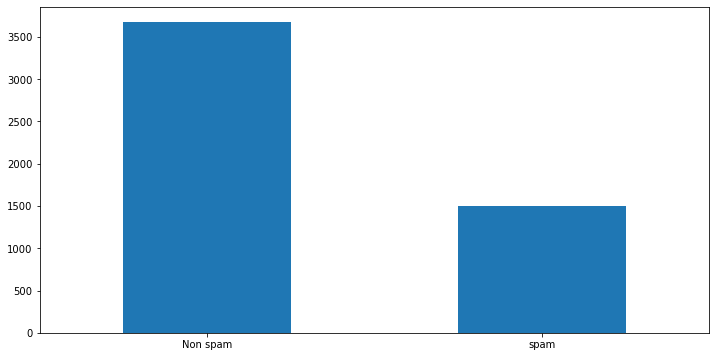

In [10]:
df["label_num"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0);
#Here in the plot, we can see that almost 3500 does not spam and around 1500 are spam messages.

# Cleaning the Text

In [11]:
import re
nltk.download('stopwords')
corpus = []
length = len(df)
for i in range(0,length):
    text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)
print(corpus[:10])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos', 'subject hpl nom januari 9 2001 see attach file hplnol 09 xl hplnol 09 xl', 'subject neon retreat ho ho ho around wonder time year neon leader retreat time know time year extrem hectic tough think anyth past holiday life go past week decemb 25 januari 1 like think minut calend hand begin fall semest retreat schedul weekend januari 5 6 youth minist confer brad dustin connect week go chang date follow weekend januari 12 13 come part need think think agre import us get togeth time recharg batteri get far spring semest lot troubl difficult us get away without kid etc brad came potenti altern get togeth weekend let know prefer first option would retreat similar done past sever year year could go heartland countri inn www com outsid brenham nice place 13 bedroom 5 bedroom hous s

 Explanation:
 1: we are importing re library, which is used to perform regex in python.
 2: Define an empty corpus list, that can be used to store all the text after cleaning.
 3: initializing the var length with the length of the data frame.
 4: running a loop from 0 to the length of our data frame.
 5: Removing all characters except the lower alphabet, bigger alphabets, and digits.
 6: Converting the text to lower.
 7: Splitting the text by spaces.
 8: creating an object of porter stemmer.
 9: Initializing all the stopword in English dictionary to var stopword
 10: Running a loop in the length of the sentence and then for each word in the sentence checking it in stopword and if it does not find in stopword then apply Stemming on to the text and add it to the list.
 11: Just concatenating all the words to make a sentence
 12: appending the sentence to the corpus list
 13: Printing the corpus list.
In Cleaning Process the next step is to convert the list of the sentence(corpus) into vectors so that we can feed this data into our machine learning model. for converting the text into vectors we are going to use a bag of words which is going to convert the text into binary form.’

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()

In [13]:
y = df['label_num']

# Dumping the CV for future use

In [14]:
import pickle ## importing pickle used for dumping models
pickle.dump(cv, open('cv.pkl', 'wb')) ## saving to into cv.pkl file

# Splitting data into train and validation sets using train_test_split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
##train size 80% and test size 20%


In [16]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
classifier.fit(X_train , y_train)

MultinomialNB()

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


<AxesSubplot:>

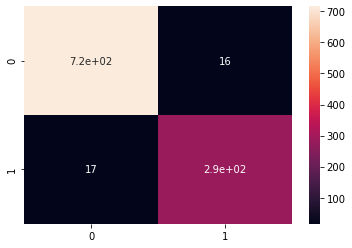

In [19]:
sns.heatmap(cm,annot=True)

In [20]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test, y_pred) 


0.9681159420289855

In [21]:
f1_score(y_test, y_pred)

0.9454545454545454

# To save our model we are going to use pickle

In [22]:
import pickle
pickle.dump(classifier, open("spam.pkl", "wb"))

# Save model by loading it and testing on test data.

In [23]:
loaded_model = pickle.load(open("spam.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.9681159420289855

# Prediction for a new email

In [25]:
def new_review(new_review):
    
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = loaded_model.predict(new_X_test)
    
    return new_y_pred
new_review = new_review(str(input("Enter new review...")))

if new_review[0]==1:
    
    print("SPAM")
    
else :
    
    print("NOT SPAM")

Enter new review...IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out. 
SPAM


In [26]:
!pip install flask